## 

## Plan 1:
1.) apply naive ML techniques to the csv data, try to gain insights.

In [1]:
import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression as sk_OLS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
import math

from sklearn.metrics import r2_score
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

In [2]:

cross_sectional = pd.read_csv("datacsv/oasis_cross-sectional.csv")
cross_sectional.fillna(value=0, inplace=True)
y = cross_sectional.CDR
X = cross_sectional.drop(["CDR", "M/F", "Hand", "ID"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train))
print(len(y_train))
print(len(X_test))
# print(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
    


327
327
109


In [3]:
def rename(x):
    if x == "Nondemented":
        return 0.0
    elif x == "Demented" or x == "Converted":
        return 1.0
    else:
        return x

In [4]:
longitudinal = pd.read_csv("datacsv/oasis_longitudinal.csv")
cross_sectional = pd.read_csv("datacsv/oasis_cross-sectional.csv")

frames = [cross_sectional, longitudinal]
combined = pd.concat(frames)
# combined = combined.rename(columns={"Group": "CDR"})
combined = combined.map(rename)
# combined["Group"] = combined["Group"].astype('float')
# print(combined)
combined.reset_index(inplace=True, drop=True)

# TODO: dont fillNA pull out CDR that are NA and use those as testing set. 
combined.fillna(value=0, inplace=True)
print(combined)
combined.to_csv("combined.csv")

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   0.0  0.0   0.0  0.0  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   0.0  0.0   0.0  0.0  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
804              0   M    R   82   0.0  1.0  28.0  0.5  1693  0.694  1.037   
805              0   M    R   86   0.0  1.0  26.0  0.5  1688  0.675  1.040   
806              0   F    R   61   0.0  2.0  30.0  0.0  1319  0.801  1.331   
807              0   F    R   63   0.0  2.0  30.0  0.0  1327  0.796  1.323   
808              0   F    R   65   0.0  2.0  30.0  0.0  1333  0.801  1.317   

     Delay Subject ID         MRI ID  Group  Visit  MR Delay  E

In [5]:

y = combined.CDR
combined["NewEd"] = combined.Educ + combined.EDUC
X = combined.drop(["CDR", "M/F", "Hand", "Subject ID", "MRI ID", "ID", "Group", "Visit", "Educ", "EDUC", "Delay"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train))
# print(y_train)
print(len(X_test))
print(X)
# print(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

606
203
     Age  SES  MMSE  eTIV   nWBV    ASF  MR Delay  NewEd
0     74  3.0  29.0  1344  0.743  1.306       0.0    2.0
1     55  1.0  29.0  1147  0.810  1.531       0.0    4.0
2     73  3.0  27.0  1454  0.708  1.207       0.0    4.0
3     28  0.0   0.0  1588  0.803  1.105       0.0    0.0
4     18  0.0   0.0  1737  0.848  1.010       0.0    0.0
..   ...  ...   ...   ...    ...    ...       ...    ...
804   82  1.0  28.0  1693  0.694  1.037     842.0   16.0
805   86  1.0  26.0  1688  0.675  1.040    2297.0   16.0
806   61  2.0  30.0  1319  0.801  1.331       0.0   13.0
807   63  2.0  30.0  1327  0.796  1.323     763.0   13.0
808   65  2.0  30.0  1333  0.801  1.317    1608.0   13.0

[809 rows x 8 columns]


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

print(clf.feature_count_)

Accuracy:  0.43842364532019706
[[3.41680e+04 9.23000e+02 1.13780e+04 8.12105e+05 4.20422e+02 6.58163e+02
  1.47563e+05 4.18300e+03]
 [4.12200e+03 1.12000e+02 1.10900e+03 8.08770e+04 3.81040e+01 6.39720e+01
  1.47040e+04 5.19000e+02]
 [3.21000e+02 1.10000e+01 7.00000e+01 6.02400e+03 2.82800e+00 4.69300e+00
  1.17500e+03 3.80000e+01]]


In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

clf_sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-5, random_state=42)
clf_sgd.fit(X_train, y_train)
y_pred = clf_sgd.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

# why are there three of these 
print(f"Coef\n{clf_sgd.coef_}")

coefficients = clf_sgd.coef_
# Find the top weighted coefficients
top_coefficients = sorted(enumerate(coefficients[0]), key=lambda x: abs(x[1]), reverse=True)[:8]
coef_names = ["Age", "SES", "MMSE", "eTIV", "nWBV", "ASF", "MR Delay", "NewEd"]

print(top_coefficients)
ranked = []
for i in top_coefficients:
    print(coef_names[i[0]])
    ranked.append(coef_names[i[0]])

Accuracy:  0.896551724137931
Coef
[[-4.72024309e+04 -1.21003770e+03  2.75568550e+04  3.39336660e+03
   5.15835566e+02  5.01782030e+02 -8.92183596e+02 -6.28474293e+03]
 [ 3.77974247e+04  3.16228934e+02 -2.58226739e+04 -1.45368505e+03
  -5.21480873e+02 -5.81093254e+02 -1.36817416e+03  6.93283535e+03]
 [ 7.98168561e+03  6.93790290e+02 -1.95128519e+03 -2.51808708e+03
  -2.99197062e+01 -8.99759282e+00 -2.84949583e+03  4.89369936e+02]]
[(0, -47202.43091554991), (2, 27556.855015064335), (7, -6284.742926433075), (3, 3393.366602761938), (1, -1210.0377033104485), (6, -892.1835964625541), (4, 515.8355655655863), (5, 501.7820298483305)]
Age
MMSE
NewEd
eTIV
SES
MR Delay
nWBV
ASF


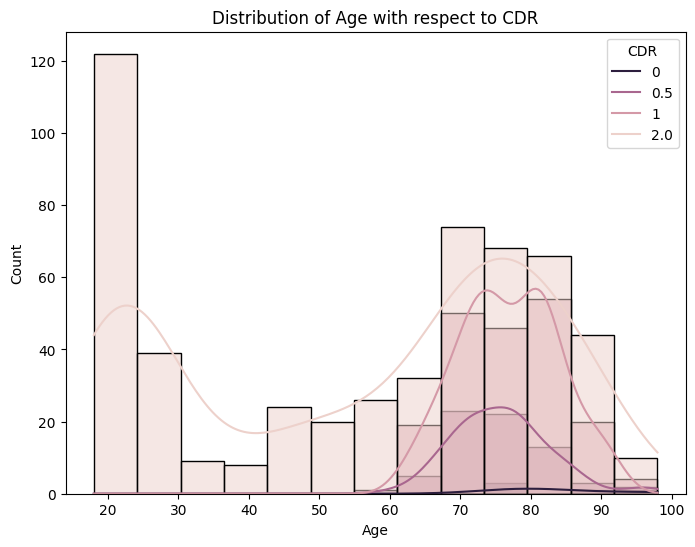

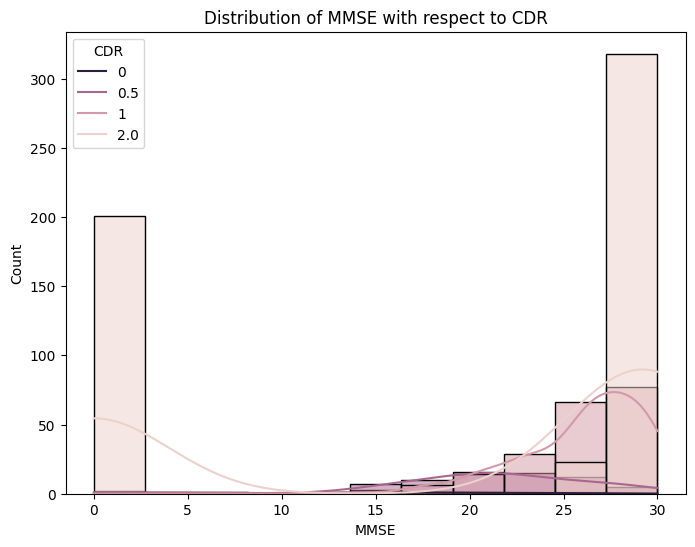

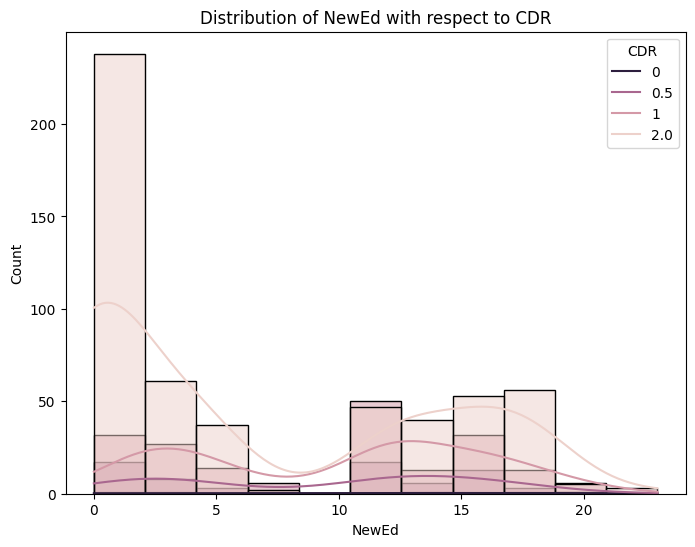

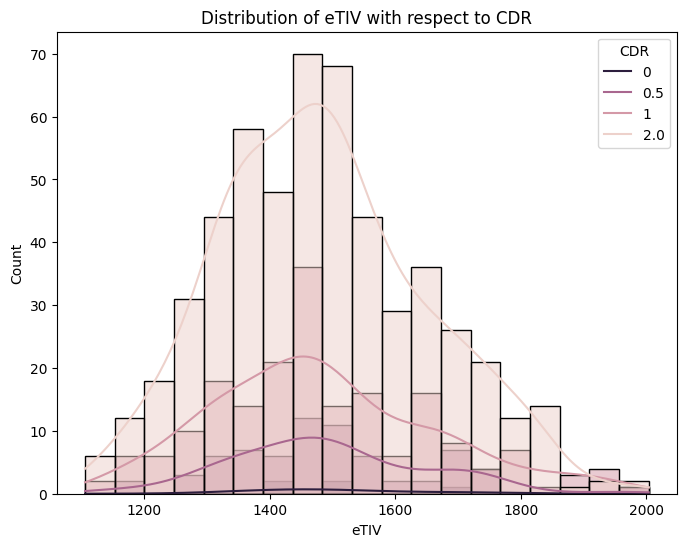

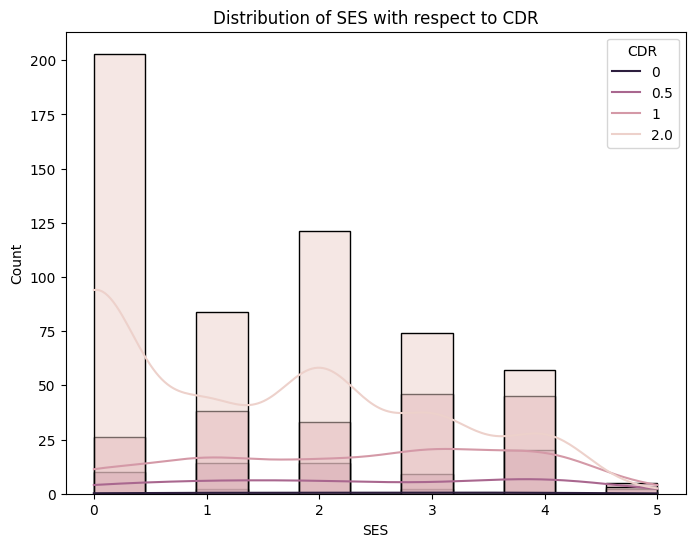

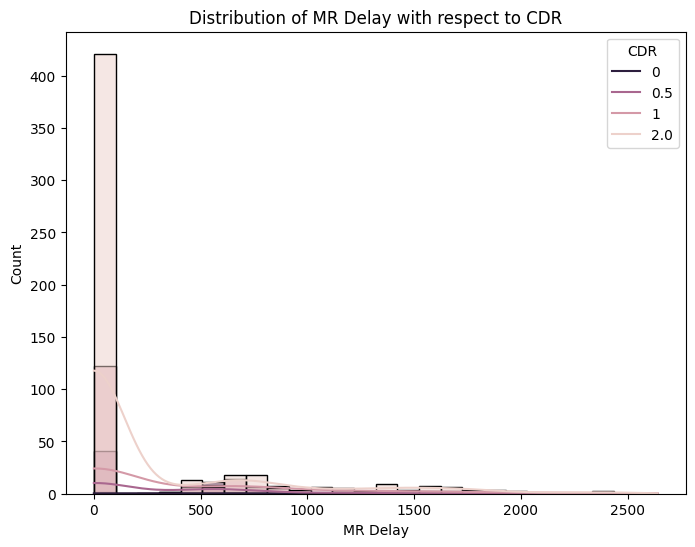

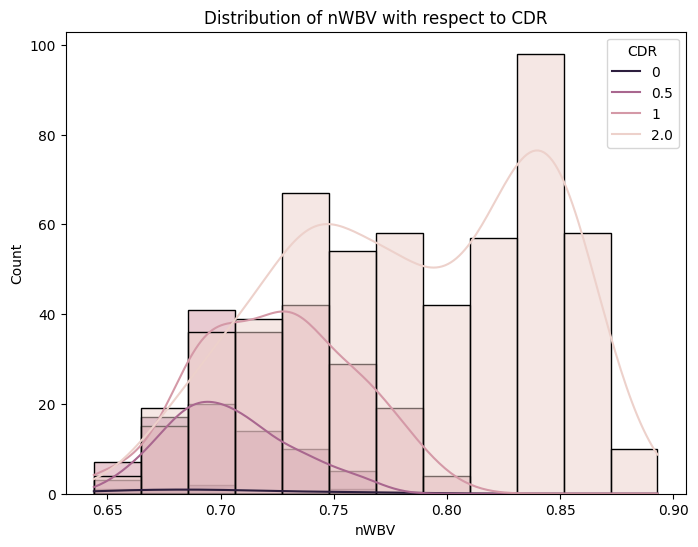

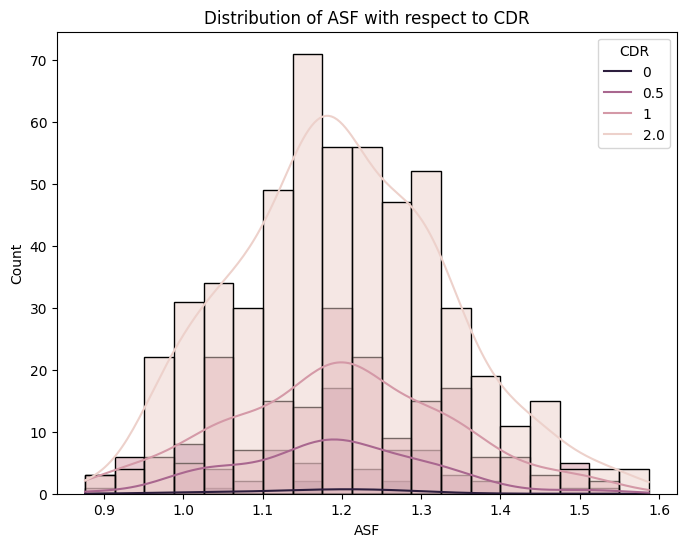

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'feature1', 'feature2', etc., with the actual feature column names in your dataset
# Replace 'class_label' with the actual class label column name in your dataset
features = ['feature1', 'feature2', 'feature3']  # Add all your feature column names here
features = ranked
class_label = 'CDR'

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=combined, x=feature, hue=class_label, kde=True)
    plt.title(f"Distribution of {feature} with respect to {class_label}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend([0,.5,1,2.0], title=class_label)
    plt.show()


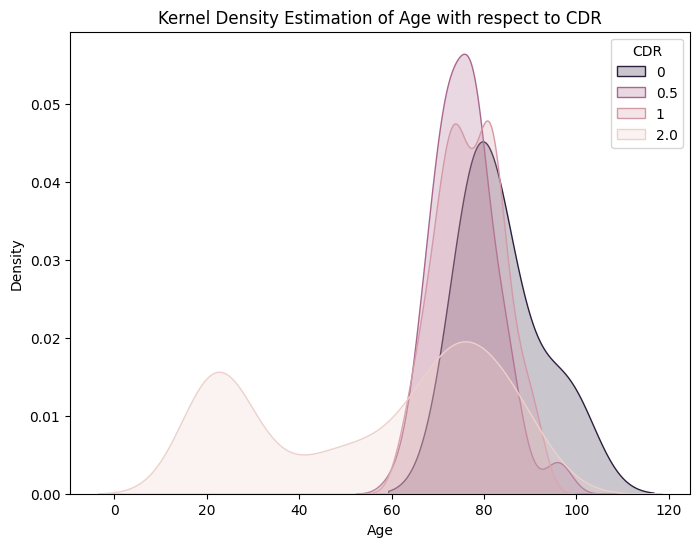

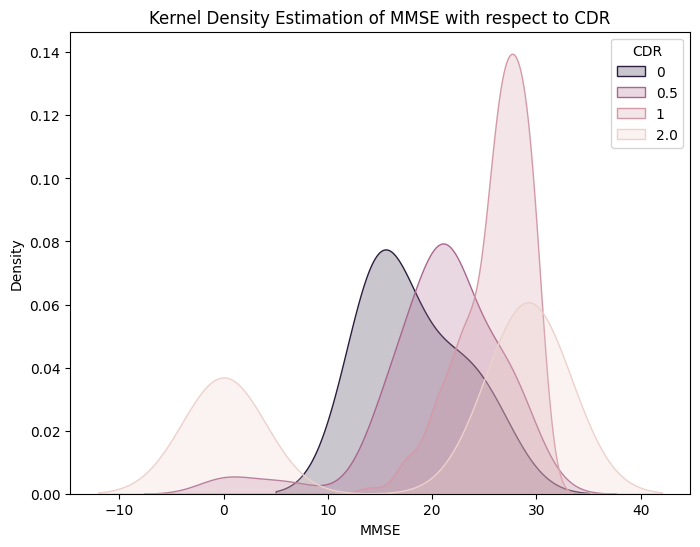

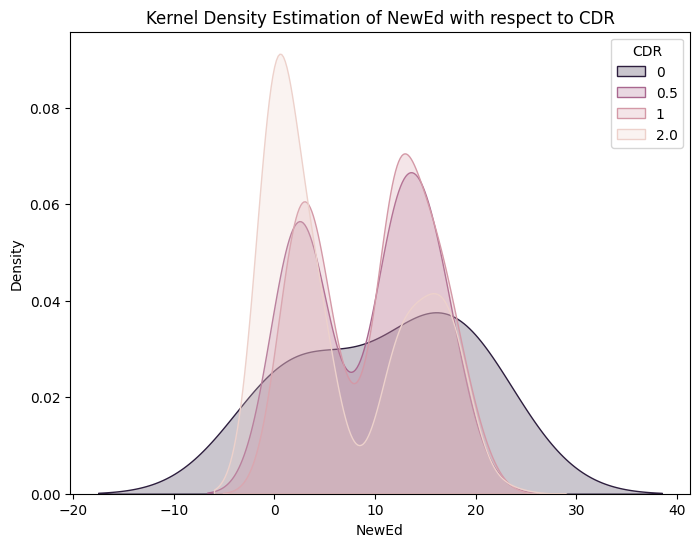

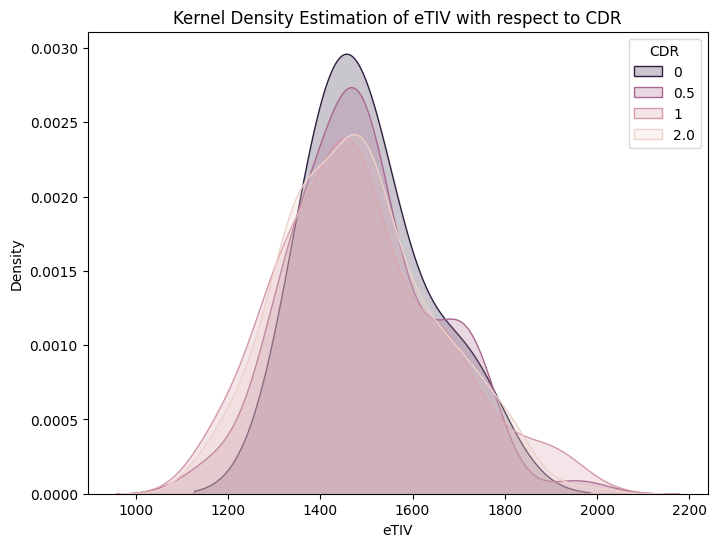

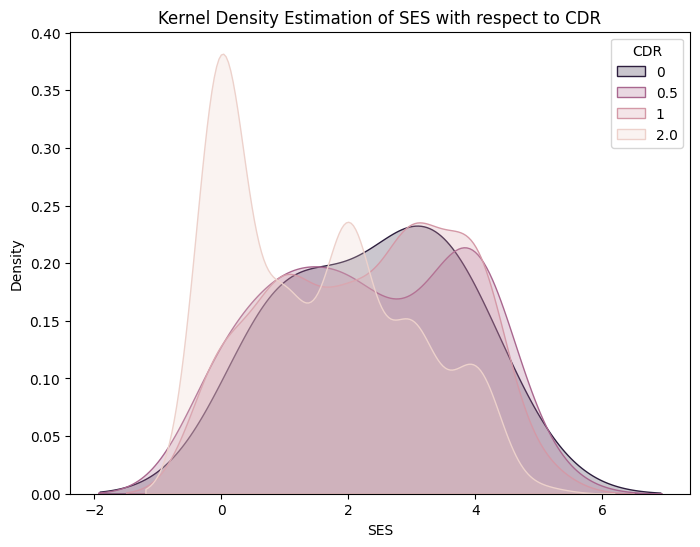

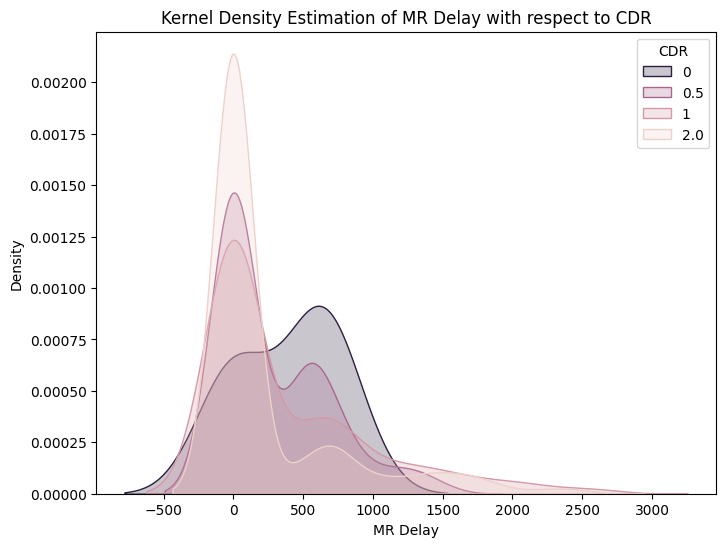

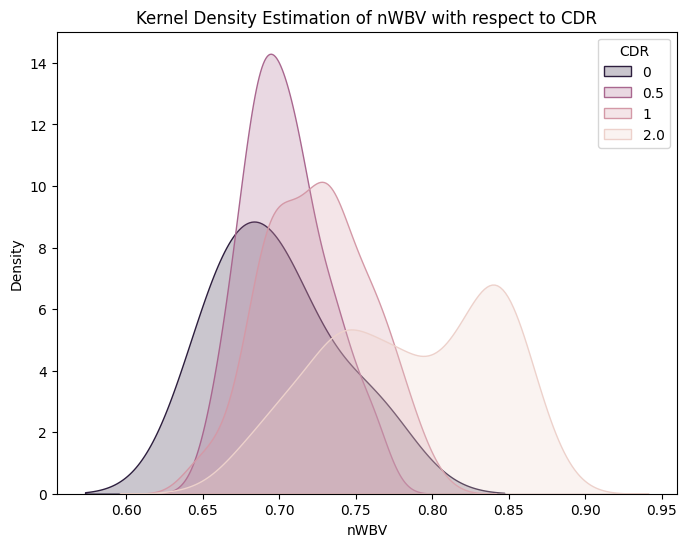

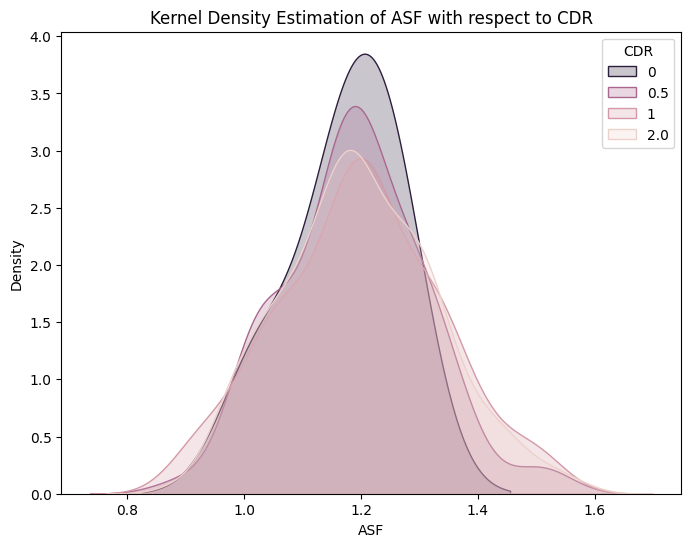

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ranked
class_label = 'CDR'

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=combined, x=feature, hue=class_label, fill=True, common_norm=False)
    plt.title(f"Kernel Density Estimation of {feature} with respect to {class_label}")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend([0,.5,1,2.0], title=class_label)
    plt.show()



## Analysis

